# COGS 108 - An Analysis on the Risks that Lead to Heart Problems

---



https://youtu.be/q-L63tzdvt4

# Overview

In order to analyze the relationship between different health factors and having heart problems, we looked at each individual variable and its correlation with having heart problems. This was first analyzed using graphs that compared proportions of individuals having certain health issues and whether or not they had heart problems. We then mathematically supported this by running a chi-squared test of independence for each variable. Then, we trained classification models on the significant variables in order to predict whether or not an individual with certain characteristics would have heart problems. Therefore, given these factors, we have around a 91% chance of correctly determining whether an individual suffers from a heart problem.

# Names

- Alvin
- Daniel
- Jeffrey
- Karina
- Sajeda

<a id='research_question'></a>
# Research Question

To what extent can we predict one's risk of heart disease based on blood pressure, cholestrol, cholestrol checkups, BMI, smoking, stroke, diabetes, physical activity, diet, alcohol usage, healthcare, access to doctor, general health, mental health, physical health, different walk, sex, age, education, income?

<a id='background'></a>

## Background & Prior Work

Heart disease is the leading cause of death in the United States[^jcc]. The term “heart disease” refers to several types of heart conditions. In the United States, the most common type of heart disease is coronary artery disease (CAD), which can lead to heart attack. About 659,000 people in the United States die from heart disease each year and cost the United States about $363 billion each year from 2016 to 2017. This includes the cost of healthcare services, medicines, and lost productivity due to death.[^cdc]. 
The most important behavioral risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol. The effects of behavioral risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity. These “intermediate risk factors” can be measured in primary care facilities and indicate an increased risk of heart attack, stroke, heart failure and other complications.[^who] 
Identifying those at highest risk of heart disease and ensuring they receive appropriate treatment can prevent premature deaths. Access to noncommunicable disease medicines and basic health technologies in all primary health care facilities is essential to ensure that those in need receive treatment and counseling.
In this paper, we seek to determine whether or not by analyzing one's lifestyle data, can we predict if they are at risk of heart disease.
[^cdc]: “About Heart Disease.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 27 Sept. 2021, https://www.cdc.gov/heartdisease/about.htm.  
[^who]: “Cardiovascular Diseases.” World Health Organization, World Health Organization, https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1. 
[^jcc]: “Heart Disease: Causes, Prevention, and Current Research.” Johnson County Community College, Johnson County Community College, https://scholarspace.jccc.edu/cgi/viewcontent.cgi?article=1047&context=honors_journal. 


# Hypothesis


Our team believes that given certain parameters on an individual, we can determine how likely (or how at risk) they are for getting heart disease. We believe that if an individual has diabetes, high blood pressure, high cholesterol, high BMI, had stroke, are heavy drinkers and smokers then they are at more risk of heart problems. We also believe that age and sex would also play a major role in having heart disease where age greater than fifty would have high risk of heart disease and males in general would also have high risk of heart disease than females.

We also hypothesize that individuals that have good education and income and are more physically active would be least likely to have any heart problems. This also includes individuals that have good diet, check their cholesterol levels regularly and don’t have any difficulty in walking.

Our team also hypothesizes that having no doctor due to cost would also increase the chance of having a heart problem because it would prevent the patient from taking necessary actions for preventing heart disease. 


# Dataset(s)

- Dataset Name: Heart Disease Health Indicators Dataset
- Link to the dataset: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
- Number of observations: 253,680

This dataset contains survey responses from the Behavioral Risk Factor Surveillance System, which keeps track of the 22 unique traits of each individual. The dataset assigns a 0 if an individual does not have a trait, and a 1 if they do, otherwise, for quantitative variables, it just has the values.

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install researchpy
import researchpy as rp

import scipy.stats as stats
import random

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Cleaning

For our data cleaning, in order to make visualization more clear we rename columns and aggregate some of the other related columns. We tried to use as much data as possible from our dataset, dropping data only if we decide they are not significant. The dataset we used has already been cleaned, so we only need to adjust some columns for our own purposes.

In [ ]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df = df.rename(columns={'HeartDiseaseorAttack': 'HeartProblem', 'HvyAlcoholConsump': 'Alcohol', 'AnyHealthcare': 'Healthcare', 'NoDocbcCost': 'NoDoc'})
df.head()

,HeartProblem,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,Healthcare,NoDoc,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df['Diet'] = df['Fruits'] + df['Veggies']
df = df.drop(['Fruits', 'Veggies'], axis=1)
df.head()

,HeartProblem,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Alcohol,...,NoDoc,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diet
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,2.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,2.0


For the columns HeartProblem, HighBP, HighChol, CholCheck, Smoker, Stroke, PhysActivity, Alcohol, Healthcare, NoDoc, DiffWalk, a 0 represents not having that condition and a 1 means we have that condition.

CholCheck refers to whether the patient has had a cholestrol check in the past 5 years.

NoDoc means the patient does not have access to a doctor due to cost.

DiffWalk means the has serious difficulty walking or climbing stairs.

For Diabetes, a 0 means no diabetes, 1 means pre-diabetes, and 2 means diabetes.

For Diet, 0 means no fruits or veggies, 1 means either fruits or veggies, and a 2 means the patient eats both fruits and veggies.

GenHlth is a scale where 1 means the patient is very healthy and 5 means the patient has poor health.

MentHlth is the number of days in the past 30 days where the patient has suffered from a poor mental health.

PhysHlth is the number of days in the past 30 days where the patient has had poor physical health.

For Sex, 0 means female and 1 means male.

For Age, it is a scale from 1-13, where 1 is 18-24, and the age group are in increments of 5, up to 80. 

Education is the highest grade that the patient has completed.

Income is a scale from 1-8 where 1 is less than \$10,000 and 8 is \$75,000 or more.

In [ ]:
df.isna().sum()

HeartProblem    0
HighBP          0
HighChol        0
CholCheck       0
BMI             0
Smoker          0
Stroke          0
Diabetes        0
PhysActivity    0
Alcohol         0
Healthcare      0
NoDoc           0
GenHlth         0
MentHlth        0
PhysHlth        0
DiffWalk        0
Sex             0
Age             0
Education       0
Income          0
Diet            0
dtype: int64

We confirm that our dataset does not have any null values.

# Data Analysis & Results

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   HeartProblem  253680 non-null  float64
 1   HighBP        253680 non-null  float64
 2   HighChol      253680 non-null  float64
 3   CholCheck     253680 non-null  float64
 4   BMI           253680 non-null  float64
 5   Smoker        253680 non-null  float64
 6   Stroke        253680 non-null  float64
 7   Diabetes      253680 non-null  float64
 8   PhysActivity  253680 non-null  float64
 9   Alcohol       253680 non-null  float64
 10  Healthcare    253680 non-null  float64
 11  NoDoc         253680 non-null  float64
 12  GenHlth       253680 non-null  float64
 13  MentHlth      253680 non-null  float64
 14  PhysHlth      253680 non-null  float64
 15  DiffWalk      253680 non-null  float64
 16  Sex           253680 non-null  float64
 17  Age           253680 non-null  float64
 18  Educ

In [ ]:
df.describe()

,HeartProblem,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Alcohol,...,NoDoc,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diet
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.056197,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,1.445676
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.230302,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.693422
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,2.000000


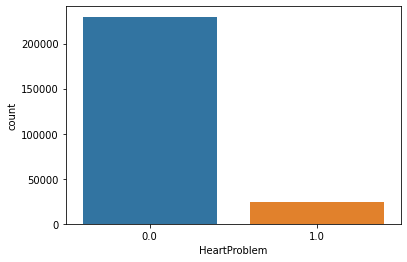

In [ ]:
sns.countplot(x="HeartProblem", data=df)

We check the distribution in the whole dataset, comparing the counts of not having heart problems versus the counts of having heart problems.

In [ ]:
def make_pivot_table(col):
    heart_rel = df.pivot_table(index='HeartProblem', columns=col, aggfunc='size')
    pt = heart_rel.div(heart_rel.sum(axis=0), axis=1)
    pt = pt.rename(columns={0: 'No', 1: 'Yes'})
    pt.index = ['No', 'Yes']
    pt.index.name = 'HeartProblem'
    return pt

In [ ]:
bp = make_pivot_table('HighBP')
bp

HighBP,No,Yes
HeartProblem,,
No,0.95882,0.835264
Yes,0.04118,0.164736


In [ ]:
smoke = make_pivot_table('Smoker')
smoke

Smoker,No,Yes
HeartProblem,,
No,0.935635,0.868345
Yes,0.064365,0.131655


In [ ]:
heart_diabetes = df.pivot_table(index='HeartProblem', columns='Diabetes', aggfunc='size')
diabetes = heart_diabetes.div(heart_diabetes.sum(axis=0), axis=1)
diabetes = diabetes.rename(columns={0: 'No Diabetes', 1: 'Pre-Diabetes', 2:'Diabetes'})
diabetes.index = ['No', 'Yes']
diabetes.index.name = 'HeartProblem'
diabetes

Diabetes,No Diabetes,Pre-Diabetes,Diabetes
HeartProblem,,,
No,0.928167,0.856618,0.777118
Yes,0.071833,0.143382,0.222882


In [ ]:
activity = make_pivot_table('PhysActivity')
activity

PhysActivity,No,Yes
HeartProblem,,
No,0.860865,0.920279
Yes,0.139135,0.079721


In [ ]:
heart_diet = df.pivot_table(index='HeartProblem', columns='Diet', aggfunc='size')
diet = heart_diet.div(heart_diet.sum(axis=0), axis=1)
diet = diet.rename(columns={0: 'Neither', 1: 'One of Fruits/Veggies', 2:'Both'})
diet.index = ['No', 'Yes']
diet.index.name = 'HeartProblem'
diet

Diet,Neither,One of Fruits/Veggies,Both
HeartProblem,,,
No,0.882002,0.900535,0.91377
Yes,0.117998,0.099465,0.08623


In [ ]:
alcohol = make_pivot_table('Alcohol')
alcohol

Alcohol,No,Yes
HeartProblem,,
No,0.903748,0.940516
Yes,0.096252,0.059484


In [ ]:
stroke = make_pivot_table('Stroke')
stroke

Stroke,No,Yes
HeartProblem,,
No,0.918007,0.61747
Yes,0.081993,0.38253


In [ ]:
heart_sex = df.pivot_table(index='HeartProblem', columns='Sex', aggfunc='size')
sex = heart_sex.div(heart_sex.sum(axis=0), axis=1)
sex = sex.rename(columns={0: 'Female', 1: 'Male'})
sex.index = ['No', 'Yes']
sex.index.name = 'HeartProblem'
sex

Sex,Female,Male
HeartProblem,,
No,0.928121,0.877464
Yes,0.071879,0.122536


In [ ]:
highchol = make_pivot_table('HighChol')
highchol

HighChol,No,Yes
HeartProblem,,
No,0.951126,0.84429
Yes,0.048874,0.15571


In [ ]:
cholcheck = make_pivot_table('CholCheck')
cholcheck

CholCheck,No,Yes
HeartProblem,,
No,0.971383,0.903272
Yes,0.028617,0.096728


In [ ]:
healthcare = make_pivot_table('Healthcare')
healthcare

Healthcare,No,Yes
HeartProblem,,
No,0.929935,0.904573
Yes,0.070065,0.095427


In [ ]:
nodoc = make_pivot_table('NoDoc')
nodoc

NoDoc,No,Yes
HeartProblem,,
No,0.90856,0.875948
Yes,0.09144,0.124052


In [ ]:
diffwalk = make_pivot_table('DiffWalk')
diffwalk

DiffWalk,No,Yes
HeartProblem,,
No,0.933755,0.767663
Yes,0.066245,0.232337


In [ ]:
heart_gen = df.pivot_table(index='HeartProblem', columns='GenHlth', aggfunc='size')
gen = heart_gen.div(heart_gen.sum(axis=0), axis=1)
gen.index = ['No', 'Yes']
gen.index.name = 'HeartProblem'
gen

GenHlth,1.0,2.0,3.0,4.0,5.0
HeartProblem,,,,,
No,0.977571,0.953662,0.895381,0.786886,0.660045
Yes,0.022429,0.046338,0.104619,0.213114,0.339955


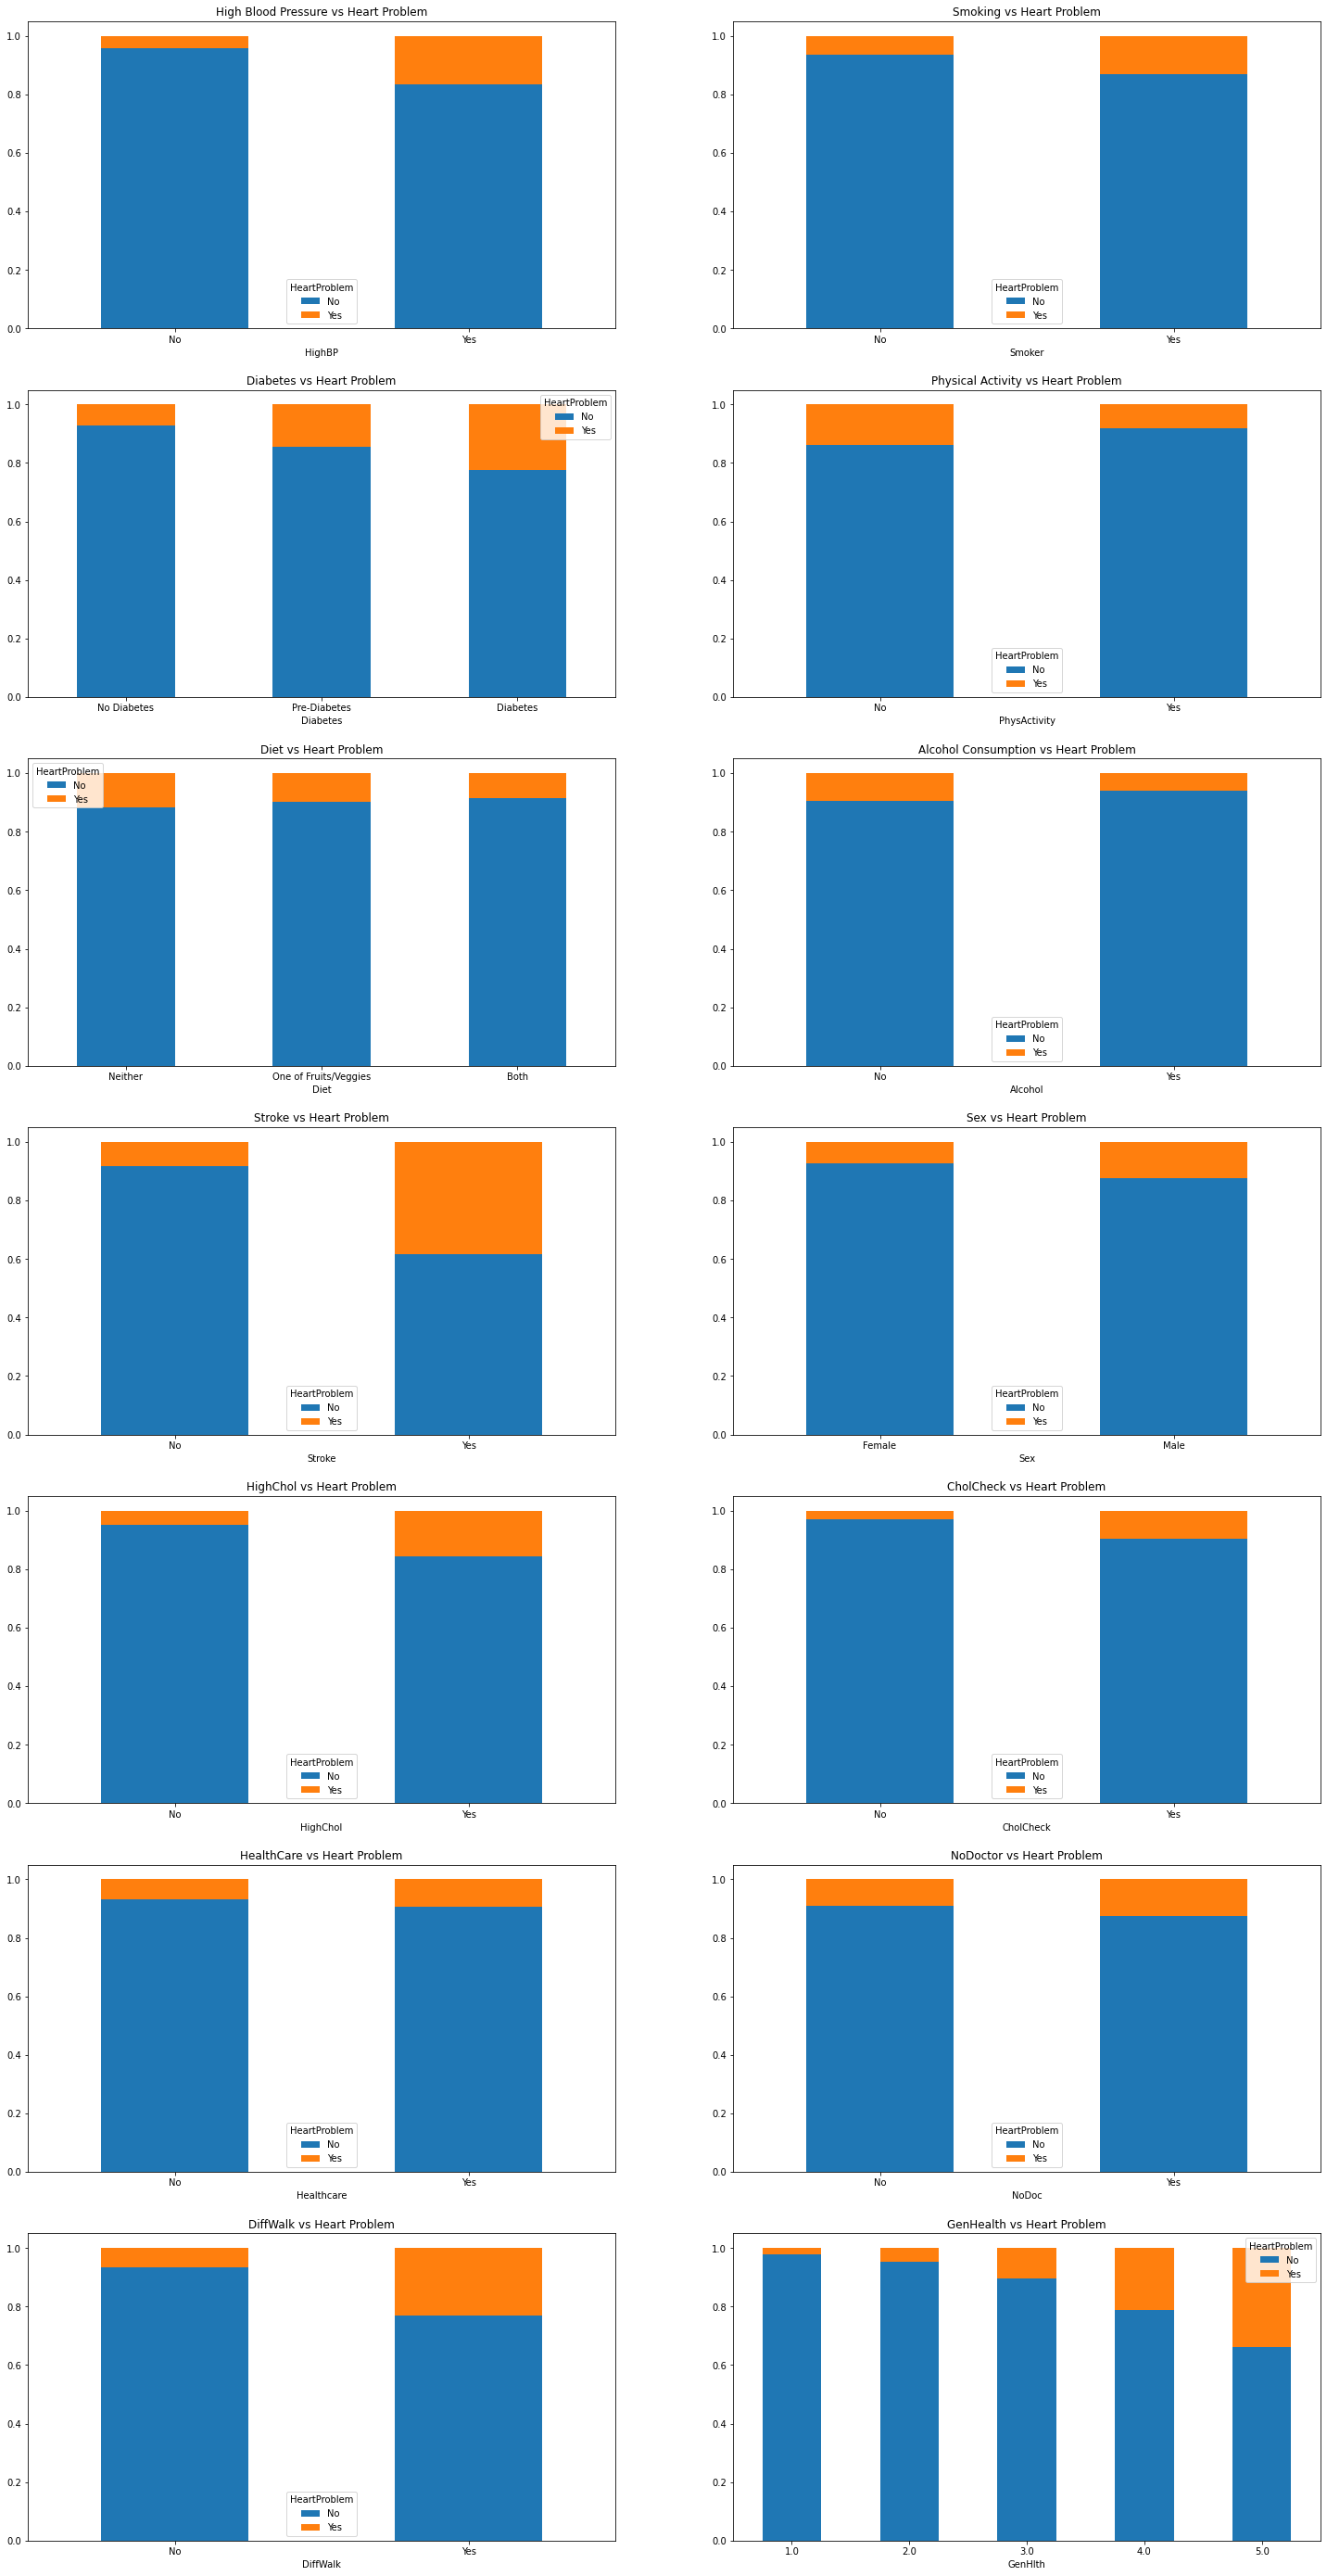

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(25,50))

ax1 = bp.T.plot(kind='bar', stacked=True, ax=axs[0][0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
ax1.set_title('High Blood Pressure vs Heart Problem')

ax2 = smoke.T.plot(kind='bar', stacked=True, ax=axs[0][1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 0)
ax2.set_title('Smoking vs Heart Problem')

ax3 = diabetes.T.plot(kind='bar', stacked=True, ax=axs[1][0])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 0)
ax3.set_title('Diabetes vs Heart Problem')

ax4 = activity.T.plot(kind='bar', stacked=True, ax=axs[1][1])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 0)
ax4.set_title('Physical Activity vs Heart Problem')

ax5 = diet.T.plot(kind='bar', stacked=True, ax=axs[2][0])
ax5.set_xticklabels(ax5.get_xticklabels(), rotation = 0)
ax5.set_title('Diet vs Heart Problem')

ax6 = alcohol.T.plot(kind='bar', stacked=True, ax=axs[2][1])
ax6.set_xticklabels(ax6.get_xticklabels(), rotation = 0)
ax6.set_title('Alcohol Consumption vs Heart Problem')

ax7 = stroke.T.plot(kind='bar', stacked=True, ax=axs[3][0])
ax7.set_xticklabels(ax7.get_xticklabels(), rotation = 0)
ax7.set_title('Stroke vs Heart Problem')

ax8 = sex.T.plot(kind='bar', stacked=True, ax=axs[3][1])
ax8.set_xticklabels(ax8.get_xticklabels(), rotation = 0)
ax8.set_title('Sex vs Heart Problem')

ax9 = highchol.T.plot(kind='bar', stacked=True, ax=axs[4][0])
ax9.set_xticklabels(ax9.get_xticklabels(), rotation = 0)
ax9.set_title('HighChol vs Heart Problem')

ax10 = cholcheck.T.plot(kind='bar', stacked=True, ax=axs[4][1])
ax10.set_xticklabels(ax10.get_xticklabels(), rotation = 0)
ax10.set_title('CholCheck vs Heart Problem')

ax11 = healthcare.T.plot(kind='bar', stacked=True, ax=axs[5][0])
ax11.set_xticklabels(ax11.get_xticklabels(), rotation = 0)
ax11.set_title('HealthCare vs Heart Problem')

ax12 = nodoc.T.plot(kind='bar', stacked=True, ax=axs[5][1])
ax12.set_xticklabels(ax12.get_xticklabels(), rotation = 0)
ax12.set_title('NoDoctor vs Heart Problem')

ax13 = diffwalk.T.plot(kind='bar', stacked=True, ax=axs[6][0])
ax13.set_xticklabels(ax13.get_xticklabels(), rotation = 0)
ax13.set_title('DiffWalk vs Heart Problem')

ax14 = gen.T.plot(kind='bar', stacked=True, ax=axs[6][1])
ax14.set_xticklabels(ax14.get_xticklabels(), rotation = 0)
ax14.set_title('GenHealth vs Heart Problem')

None

From the plots, it seems that:  
- High blood pressure has a pretty large impact on whether or not you are more at risk for having a heart disease or attack.  
- Smokers have a greater chance of being at risk for having a heart disease or attack.  
- People with diabetes have a greater chance of being at risk for having a heart disease or attack.
- People who don't exercise are more at risk of having a heart disease or attack.  
- People who eat both fruits and veggies are less at risk than people that eat either fruits or veggies, and they are less at risk than people who eat neither. However, it is not a very large difference.  
- People who don't consume heavy amounts of alcohol are more likely to have a heart disease or attack than those who do.  
- People who have had a stroke before are significantly more likle to have a heart disease or attack.  
- Males are slightly more likely to have a heart disease or attack than females.
- Individuals with high cholestrol are significantly more likely to suffer from a heart problem.
- Individuals who have had a cholestrol check in the last 5 years are more likely to report having a heart problem, though the difference is not great.
- The difference in proportion of people having heart problem whether you have healthcare or not is not great.
- Individuals with no doctor due to cost are more likely to suffer from heart problem, but the difference is not large.
- People who have difficulty walking are more likely to also have a heart problem.
- Individuals who report having poor health are significantly more likely to have a heart problem than those who report otherwise. 

We run a Chi-Squared test on our dataset in order to determine which columns are truly significant to heart problems. Because our dataset is so large and chi-squared test is very sensitive to large datasets, we structured our test so that we run chi-squared on a random sample from our dataset of size 500, run it 1000 times and calculate the average p-value.

For our chi-squared test:

H_0: HeartProblem and the column that is tested are independent of each other.

H_1: HeartProblem and the column that is being tested are not independent of each other.

We set our significance value to be 0.05 as standard for statistical significance.

We checked our assumptions:
1. The variables are categorical.
2. Each row is independent.
3. The contingency table's cells are mutually exclusive.
4. The expected value in each cell are greater than 5.

In [ ]:
# get a subset of sample data
def grabSampleData(size):
  # get list of indices within range of df row
  indices = random.sample(range(0, df.shape[0]), size)
  return df.iloc[indices].reset_index()

# run chi_squared test simulations based on random sample subset and return average of p_values
def runSimulation(times, size, col1, col2):
  p_total = 0
  for i in range(times):
    df_subset = grabSampleData(size)
    crosstab = pd.crosstab(df_subset[col1], df_subset[col2])
    c, p, dof, expected = stats.chi2_contingency(crosstab)
    p_total = p_total + p
  return p_total / times

sig_list = ['HeartProblem']

for var in df.columns[1:]:
  p_val = runSimulation(1000, 500, "HeartProblem", var)
  print(var + " p-val: " + str(p_val))

  if (p_val < 0.05):
    sig_list.append(var)
    print(var + " is less than alpha=0.05 which means that " + var + " is correlated with heart disease\n")
  else:
    print(var + " is greater than alpha=0.05 which means that " + var + " is not correlated with heart disease\n")


HighBP p-val: 0.0015869258184199547
HighBP is less than alpha=0.05 which means that HighBP is correlated with heart disease

HighChol p-val: 0.005996664531461983
HighChol is less than alpha=0.05 which means that HighChol is correlated with heart disease

CholCheck p-val: 0.5205368727155655
CholCheck is greater than alpha=0.05 which means that CholCheck is not correlated with heart disease

BMI p-val: 0.34057196534186474
BMI is greater than alpha=0.05 which means that BMI is not correlated with heart disease

Smoker p-val: 0.08094343366758505
Smoker is greater than alpha=0.05 which means that Smoker is not correlated with heart disease

Stroke p-val: 0.03368251835297591
Stroke is less than alpha=0.05 which means that Stroke is correlated with heart disease

Diabetes p-val: 0.023905732409439124
Diabetes is less than alpha=0.05 which means that Diabetes is correlated with heart disease

PhysActivity p-val: 0.2131599069596871
PhysActivity is greater than alpha=0.05 which means that PhysAct

Fit a decision tree classifier model on all columns of the data, and use GridSearchCV to find the optimal max depth parameter for the decision tree. We split our dataset so that our testing set would be 25% of the dataset's total observations.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# split data into test and train sets, with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartProblem', axis=1), df['HeartProblem'], test_size=0.25)

# make dictionary of max depth values to run through in order to find the optimal one
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12]}

# create a model pipeline
pl = Pipeline([
    ('model', GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5))
])

# fit the training data to the model, predict the values, and obtain an accuracy score for the training set
fit = pl.fit(X_train, y_train)
pred = pl.predict(X_train)
acc = accuracy_score(pred, y_train)

# use the model to predict the values using the testing data, and obtain an accuracy score
pred_test = pl.predict(X_test)
acc_test = accuracy_score(pred_test, y_test)

acc, acc_test

(0.9071533690738989, 0.9066698202459792)

Fit a decision tree classifier model on significant columns of the data (obtained from the chi-square test run above), and use GridSearchCV to find the optimal max depth parameter for the decision tree. We split our dataset so that our testing set would be 25% of the dataset's total observations.

In [ ]:
# make new dataframe with only significant columns
new_df = df[sig_list]
new_df

,HeartProblem,HighBP,HighChol,Stroke,Diabetes,GenHlth,PhysHlth,DiffWalk,Age
0,0.0,1.0,1.0,0.0,0.0,5.0,15.0,1.0,9.0
1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0
2,0.0,1.0,1.0,0.0,0.0,5.0,30.0,1.0,9.0
3,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0
4,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,3.0,5.0,0.0,5.0
253676,0.0,1.0,1.0,0.0,2.0,4.0,0.0,1.0,11.0
253677,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0


In [ ]:
# split data into test and train sets, with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('HeartProblem', axis=1), new_df['HeartProblem'], test_size=0.25)

# make dictionary of max depth values to run through in order to find the optimal one
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12]}

# create a model pipeline
pl = Pipeline([
    ('model', GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5))
])

# fit the training data to the model, predict the values, and obtain an accuracy score for the training set
fit = pl.fit(X_train, y_train)
pred = pl.predict(X_train)
acc = accuracy_score(pred, y_train)

# use the model to predict the values using the testing data, and obtain an accuracy score
pred_test = pl.predict(X_test)
acc_test = accuracy_score(pred_test, y_test)

acc, acc_test

(0.9070377378324398, 0.9075685903500473)

When we fit a decision tree classifier model to the significant columns in the dataframe and to all of the columns in the dataframe, all the train and test accuracies are around 91%. The first value in the tuple is the accuracy of the training data and the second value in the tuple is the accuracy on the test data.

We also created an alternate model, which we constructed by training a neural network.

In [ ]:
X = new_df.iloc[:, 1:]
y = new_df.iloc[:, 0]
# Split data into training, testing, and validation
train, test = train_test_split(new_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
columns = new_df.columns[1:]

# Convert dataframes for use in model
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('HeartProblem')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

# Create datasets from dataframes
train_ds = df_to_dataset(train, batch_size=64)
val_ds = df_to_dataset(val, shuffle=False, batch_size=64)
test_ds = df_to_dataset(test, shuffle=False, batch_size=64)

# Function to normalize features
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer


all_inputs = []
encoded_features = []
for header in columns:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

# Build the model
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x) 
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x) 
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(all_inputs, output)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [ ]:
# Fit the model
model.fit(train_ds, epochs=10, validation_data=val_ds)
loss, accuracy = model.evaluate(test_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2537/2537 [==============================] - 10s 3ms/step - loss: 0.2777 - accuracy: 0.9013 - val_loss: 0.2507 - val_accuracy: 0.9032
Epoch 2/10
2537/2537 [==============================] - 9s 3ms/step - loss: 0.2547 - accuracy: 0.9064 - val_loss: 0.2500 - val_accuracy: 0.9032
Epoch 3/10
2537/2537 [==============================] - 10s 4ms/step - loss: 0.2515 - accuracy: 0.9064 - val_loss: 0.2503 - val_accuracy: 0.9032
Epoch 4/10
2537/2537 [==============================] - 9s 3ms/step - loss: 0.2508 - accuracy: 0.9066 - val_loss: 0.2513 - val_accuracy: 0.9032
Epoch 5/10
2537/2537 [==============================] - 9s 3ms/step - loss: 0.2499 - accuracy: 0.9067 - val_loss: 0.2512 - val_accuracy: 0.9032
Epoch 6/10
2537/2537 [==============================] - 9s 3ms/step - loss: 0.2496 - accuracy: 0.9068 - val_loss: 0.2503 - val_accuracy: 0.9032
Epoch 7/10
2537/2537 [==============================] - 9s 3ms/step - loss: 0.2498 - accuracy: 0.9065 - val_loss: 0.2512 - val_accuracy: 0.9032
E

In [ ]:
print("Accuracy", accuracy)

Accuracy 0.9071862101554871


This model also achieved an accuracy of around 90.7%, similar to the results of our descision tree model. This is a possible indication that there is a limitation to the accuracy we can achieve from the features in our dataset.

# Ethics & Privacy

With the nature of our topic and analysis, it is crucial to have no personal identifiable information linked to any observation. Therefore, when analyzing data, we will be sure to remove such information and treat each observation as an abstract object. Since our dataset did not have any private information, we did not have to remove anything for this. We got our data off of a public website, so it is publicly available to everyone to use. The results of our analysis are not a definitive prediction of whether an individual has heart problems, but just our findings based on this one dataset. 

# Conclusion & Discussion

After running the different models, we conclude that we can predict whether an individual will have or not have heart disease based on the different health and lifestyle related factors with an accuracy of approximately 91%. We found that the factors that have the greatest impact on predicting whether or not an individual has heart problems are blood pressure, cholestrol, stroke, diabetes, and other age related health issues. This supports our hypothesis where all the major diseases described had impact on heart disease. However, our hypothesis was not supported for variables such as heavy alcohol consumers, smokers, income, sex and BMI where and our model showed that they have low risk of heart disease. 

Our dataset had a disproportionate amount of individuals without heart problems, so relationships between certain columns might be skewed as a result. We only used one dataset, which also could bias our results.

Much of our data is binary, which means that the data is less detailed, so it is harder to be as accurate in capturing the nuances of the individuals. Similarly, our data was largely categorical, so we were unable to run certain significance tests such as t-test. This meant that we had to calculate significance using a chi-squared test of independence. Because chi-squared is sensitive to large sample sizes, calculating this required us to use random samples from our dataset, rather than running it on the whole dataset.  
Another limitation of our analysis is that we only tested two different classification methods -- decision trees and neural networks, so there is a possibility that there are other more accurate predictive models. 

In our analysis, we were most surprised that BMI, smoking, physical activity, alcohol, and healthcare weren't significantly related to whether an individual has a heart problem or not. In fact, individuals who heavily consumed alcohol had a smaller proportion of individuals who had heart problems. 

# Team Contributions

- Alvin Hsu: research question, background, hypothesis, data cleaning, data analysis, chi-square test
- Daniel Gitelman: research question, background, hypothesis, data cleaning, neural network model
- Jeffrey Liu: overview, research question, background, hypothesis, data cleaning, data analysis, chi-square test
- Karina Chen: overview, research question, background, hypothesis, data cleaning, data analysis, decision tree model
- Sajeda Amin: research question, background, hypothesis, dataset, data cleaning, data analysis